In [1]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BIRTHDAY = pd.Timestamp("2021-05-15")

sns.set_style('white')
plt.xkcd()

In [3]:
def split_timestamp(df):
    df[["start_date", "start_hour", "start_minute"]] = df.Time.str.split(r",|:", expand=True)
    df["start_date"] = pd.to_datetime(df.start_date, dayfirst=True)
    return df


def read_file_and_clean(file: str):
    names = ["pumped", "nursed", "nappies", "formula", "sleep", "pump"]
    if file not in names:
        raise ValueError(f"`file` must be one of {names}")
    
    with open("config.yml") as yml:
        config = yaml.safe_load(yml)
    
    return (
        pd.read_csv(config[file]["file_name"])
        .pipe(split_timestamp)
        .rename(columns=config[file].get("rename_columns", {}))
        .drop(columns=["Baby", "Time", "Note"])
        .sort_values(by=["start_date", "start_hour", "start_minute"])
        .reset_index(drop=True)
    )

In [4]:
read_file_and_clean("nursed")

,Start Side,left_duration,right_duration,total_duration,start_date,start_hour,start_minute
0,Left,25,10,0,2021-05-16,19,00
1,Right,20,8,0,2021-05-16,23,00
2,Right,8,13,0,2021-05-17,01,00
3,Right,0,12,0,2021-05-17,01,48
4,Right,0,14,0,2021-05-17,04,10
...,...,...,...,...,...,...,...
1611,Left,8,0,0,2021-11-15,13,32
1612,Left,7,0,0,2021-11-15,17,09
1613,Right,0,11,0,2021-11-15,18,55
1614,Left,5,4,0,2021-11-16,06,39


In [5]:
sleep = read_file_and_clean("sleep")


## Sleep

In [6]:
sleep

,duration,start_date,start_hour,start_minute
0,160,2021-05-16,16,00
1,148,2021-05-16,20,30
2,88,2021-05-16,23,31
3,12,2021-05-17,05,05
4,49,2021-05-17,05,41
...,...,...,...,...
1295,695,2021-11-14,19,15
1296,95,2021-11-15,08,55
1297,105,2021-11-15,13,45
1298,33,2021-11-15,17,20


In [7]:
def get_month(dates, birthday):
    return dates.dt.month - birthday.month + (dates.dt.day > birthday.day) - 1

In [8]:
sleep["week"] = (sleep["start_date"] - BIRTHDAY).dt.days // 7
sleep["month"] = get_month(sleep.start_date, BIRTHDAY)
sleep["duration_hrs"] = sleep["duration"] / 60

<AxesSubplot:title={'center':'Jesse longest sleep per week since birth'}, xlabel='week', ylabel='Longest stretch of sleep (hrs)'>

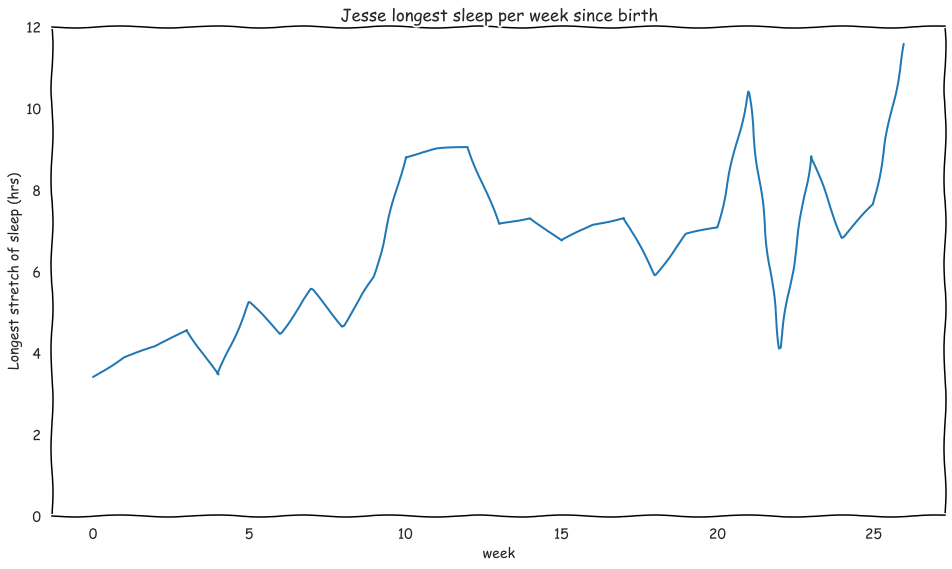

In [9]:
sleep.groupby("week").max()["duration_hrs"].plot(
    ylim=(0,12),
    ylabel="Longest stretch of sleep (hrs)",
    title="Jesse longest sleep per week since birth",
    figsize=(16,9)
)

<AxesSubplot:title={'center':'Jesse weekly sleep totals since birth'}, xlabel='week', ylabel='Total weekly sleep'>

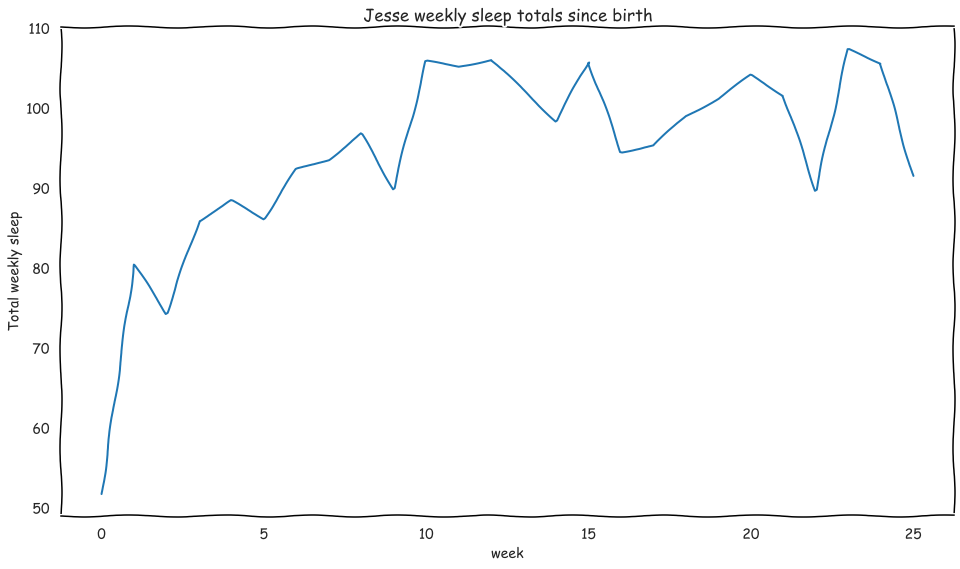

In [10]:
sleep[sleep.week < 26].groupby("week").sum()["duration_hrs"].plot(
#     xlim=(0,25),
    ylabel="Total weekly sleep",
    title="Jesse weekly sleep totals since birth",
    figsize=(16,9)
)

<AxesSubplot:title={'center':'Jesse longest sleep by week since birth'}, xlabel='week', ylabel='Longest stretch of sleep (hrs)'>

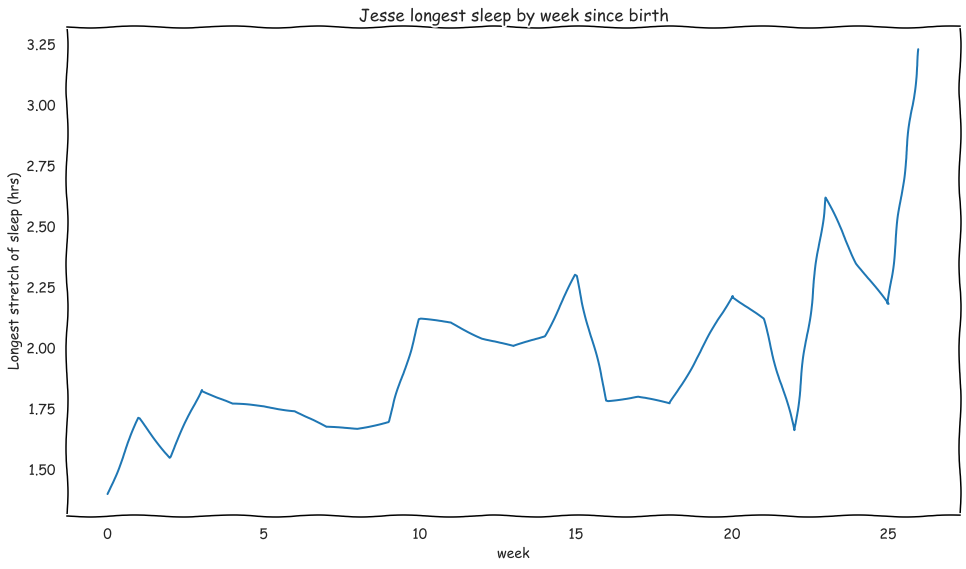

In [11]:
sleep.groupby("week").mean()["duration_hrs"].plot(
#     ylim=(0,12),
    ylabel="Longest stretch of sleep (hrs)",
    title="Jesse longest sleep by week since birth",
    figsize=(16,9)
)

<AxesSubplot:title={'center':'Jesse shortest sleep by week since birth'}, xlabel='week', ylabel='Shortest stretch of sleep that we bothered to record (mins)'>

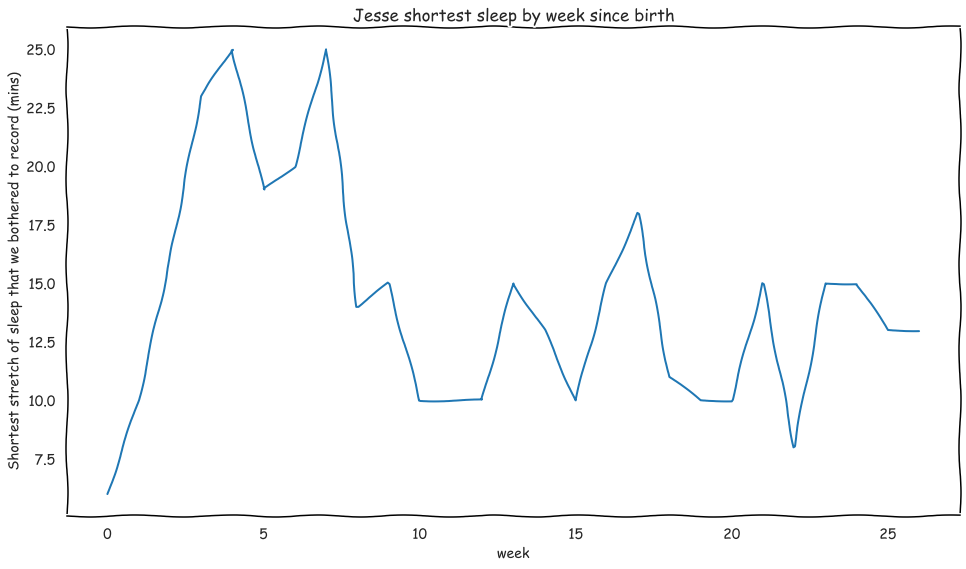

In [12]:
sleep.groupby("week").min()["duration"].plot(
#     ylim=(0,12),
    ylabel="Shortest stretch of sleep that we bothered to record (mins)",
    title="Jesse shortest sleep by week since birth",
    figsize=(16,9)
)